In [3]:
import sys
assert sys.version_info >= (3,5)

In [6]:
import sklearn
assert sklearn.__version__ >= '0.20'

In [9]:
import pandas as pd

In [77]:
oecd_bli = pd.read_csv('/home/mali/Python/handson_ml/datasets/lifesat/oecd_bli_2015.csv',thousands= ',')
gdp_per_capita = pd.read_csv('/home/mali/Python/handson_ml/datasets/lifesat/gdp_per_capita.csv',
encoding = 'latin1',thousands=',',delimiter='\t')

In [78]:
def prepare_country_stats(oecd_bli,gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
    oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator',values='Value')
    gdp_per_capita.rename(columns={'2015':'GDP per capita'},inplace=True)
    gdp_per_capita.set_index('Country',inplace=True)
    full_country_stats = pd.merge(left=oecd_bli,right=gdp_per_capita,
    left_index=True,right_index=True)
    remove_indices = [0,1,6,8,33,34,35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[['GDP per capita','Life satisfaction']].iloc[keep_indices]

In [79]:
country_stats = prepare_country_stats(oecd_bli,gdp_per_capita)

In [85]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

<AxesSubplot:xlabel='GDP per capita', ylabel='Life satisfaction'>

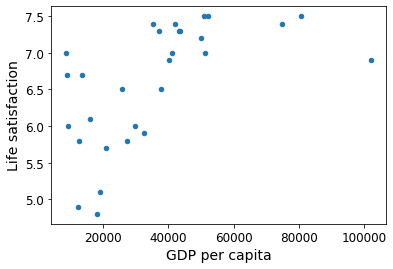

In [92]:
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]
country_stats.plot(kind = 'scatter', x='GDP per capita', y='Life satisfaction')


In [95]:
model = sklearn.linear_model.LinearRegression()
model.fit(X,y)
X_new = [[22587]]
print(model.predict(X_new))

[[6.30707099]]


In [100]:
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model1.fit(X,y)
print(model1.predict(X_new))

[[5.76666667]]
